In [1]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from tqdm import *
from scipy.integrate import nquad
from scipy.interpolate import interp1d
from scipy.special import erf
import matplotlib as mpl
import matplotlib.pylab as pylab

from IPython.display import set_matplotlib_formats

from plot_params import params
from theory.units import *
from theory.spec_calc import PowerSpectra

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
pylab.rcParams.update(params)
set_matplotlib_formats('retina')
plots_dir = "/Users/smsharma/Dropbox/Projects/LensPowerSpectra/LensPower/Draft/plots/"
data_dir = "/Users/smsharma/QuasarSims/"

/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [3]:
pspec = PowerSpectra(precompute=['NFW', 'Burk'])

In [17]:
import palettable
cols = palettable.wesanderson.FantasticFox2_5.hex_colors
save_figs = True
cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Figure 2: lens-induced power spectra for a uniform subhalo population per-subhalo

In [5]:
l_min = 1
l_max = 500
n_l = 50
l_ary = np.logspace(np.log10(l_min), np.log10(l_max), n_l)

In [30]:
M0 = 10**8*M_s
R0 = pspec.R0_VL(M0)
Dl = 10*kpc
v = 1e-3

In [7]:
Cl_NFW_ary = np.array([pspec.Cl_NFW(M0, Dl, v, l) for l in tqdm_notebook(l_ary)])/(1e-6*asctorad/Year)**2
Cl_Burk_ary = np.array([pspec.Cl_Burk(M0, Dl, v, l) for l in tqdm_notebook(l_ary)])/(1e-6*asctorad/Year)**2
Cl_tNFW_ary = np.array([pspec.Cl_tNFW(M0, Dl, v, l, tau=15) for l in tqdm_notebook(l_ary)])/(1e-6*asctorad/Year)**2
Cl_tNFW2_ary = np.array([pspec.Cl_tNFW(M0, Dl, v, l, tau=10) for l in tqdm_notebook(l_ary)])/(1e-6*asctorad/Year)**2

/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [8]:
Cl_Plummer_ary = pspec.Cl_Plummer(R0, M0, Dl, v, l_ary)/(1e-6*asctorad/Year)**2;
Cl_Gauss_ary = pspec.Cl_Gauss(R0, M0, Dl, v, l_ary)/(1e-6*asctorad/Year)**2;
Cl_Point_ary = pspec.Cl_Point(M0, Dl, v, l_ary)/(1e-6*asctorad/Year)**2;

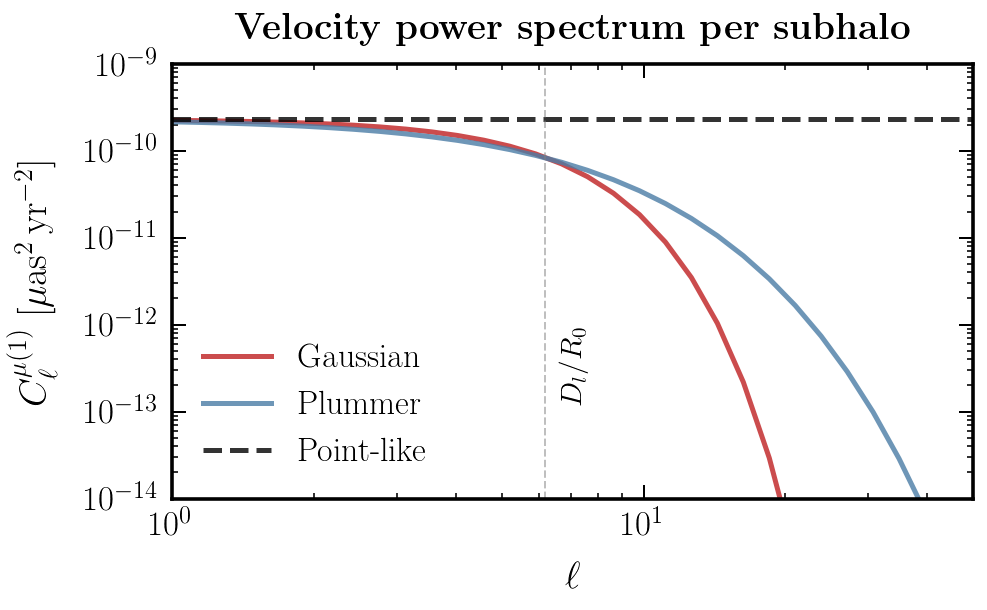

In [13]:
plt.figure(figsize=(8 / 1.15,5 / 1.15))

plt.plot(l_ary, Cl_Gauss_ary, label="Gaussian")
plt.plot(l_ary, Cl_Plummer_ary, label="Plummer", alpha=0.8)
plt.plot(l_ary, len(l_ary)*[Cl_Point_ary], label="Point-like", c='k', ls='--', alpha=0.8)

plt.axvline((1/(R0/Dl)), c='grey', lw=1, alpha=0.5, ls='--')
plt.text((1/(R0/Dl)) + .5,5e-13,'$D_l/R_0$',rotation=90, fontsize=15)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\ell$")
plt.ylabel("$C_\ell^{\mu (1)}$ [$\mu$as$^2$\,yr$^{-2}$]")


plt.xlim(l_min, 50)
plt.ylim(1e-14,1e-9)

plt.title('\\textbf{Velocity power spectrum per subhalo}', fontsize=18.5, y=1.02)


plt.legend(frameon=False, loc='lower left')

plt.tight_layout()

if save_figs:
    plt.savefig(plots_dir + "mu_single_1.pdf")

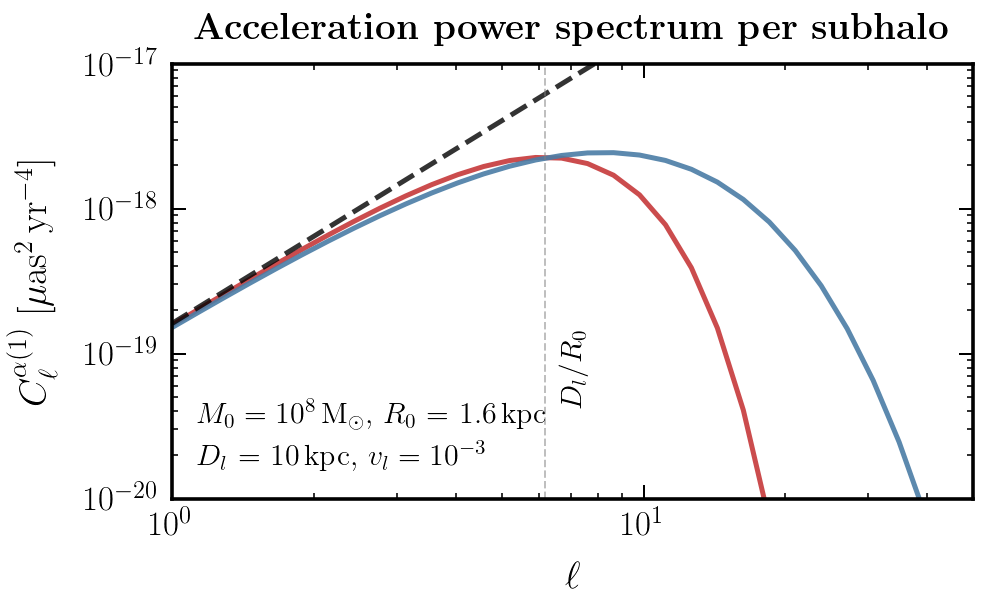

In [14]:
pref = (3/4)*l_ary**2/Dl**2/(1/Year**2)

plt.figure(figsize=(8 / 1.15,5 / 1.15))

plt.plot(l_ary, pref*Cl_Gauss_ary, label="Gaussian")
plt.plot(l_ary, pref*Cl_Plummer_ary, label="Plummer")
plt.plot(l_ary, pref*np.array(len(l_ary)*[Cl_Point_ary]), label="Point-like", c='k', ls='--', alpha=0.8)

plt.axvline((1/(R0/Dl)), c='grey', lw=1, alpha=0.5, ls='--')
plt.text((1/(R0/Dl)) + .5,10e-20,'$D_l/R_0$',rotation=90, fontsize=15)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\ell$")
plt.ylabel("$C_\ell^{\\alpha (1)}$ [$\mu$as$^2$\,yr$^{-4}$]")

plt.text(1.13, 3.05e-20,'$M_0 = 10^8\,$M$_\odot$, $R_0$ = ' + str(R0/kpc)[:3] + '\,kpc', fontsize=15)
plt.text(1.13, 1.55e-20,'$D_l$ = 10\,kpc, $v_l=10^{-3}$', fontsize=15)

plt.xlim(l_min, 50)
plt.ylim(1e-20,1e-17)

plt.title('\\textbf{Acceleration power spectrum per subhalo}', fontsize=18.5, y=1.02)

# plt.legend(frameon=False, loc='upper left')

plt.tight_layout()

if save_figs:
    plt.savefig(plots_dir + "alpha_single_1.pdf")

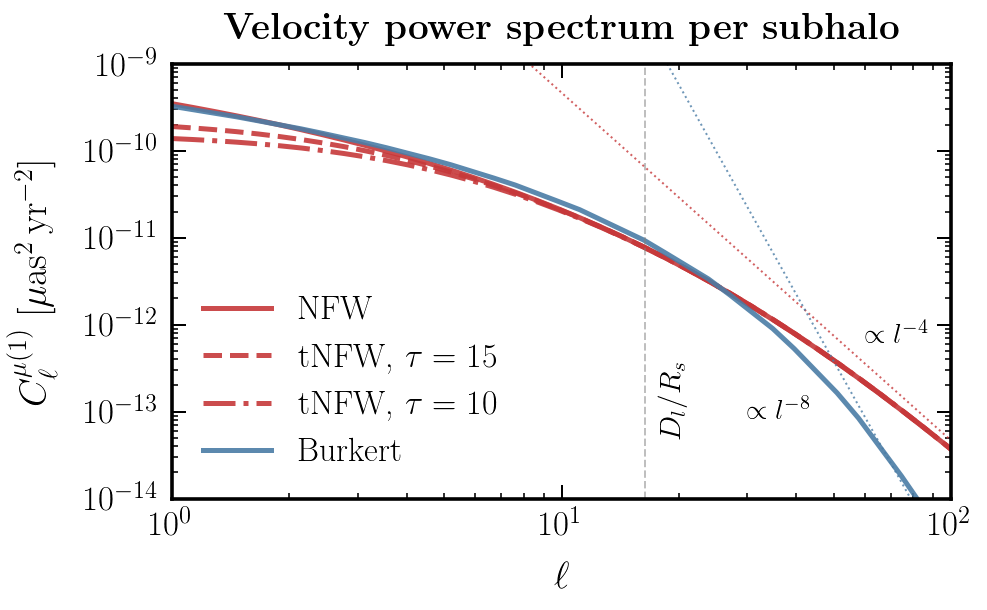

In [24]:
plt.figure(figsize=(8 / 1.15,5 / 1.15))

plt.plot(l_ary, Cl_NFW_ary, label="NFW", color=cols_default[0])
plt.plot(l_ary, Cl_tNFW_ary, label="tNFW, $\\tau = 15$", ls='--', color=cols_default[0])
plt.plot(l_ary, Cl_tNFW2_ary, label="tNFW, $\\tau = 10$", ls='-.', color=cols_default[0])
plt.plot(l_ary, Cl_Burk_ary, label="Burkert", color=cols_default[1])

n = 4
plt.plot(l_ary, (1/l_ary**n)*Cl_NFW_ary[-1]/(1/(l_ary**n)[-1]), lw=1, alpha=0.8, ls='dotted', color=cols_default[0])

n = 8
l_base = 2000
fac = pspec.Cl_Burk(M0, Dl, v, l_base)/(1e-6*asctorad/Year)**2/(1/(l_base**n))
plt.plot(l_ary, (1/l_ary**n)*fac, lw=1, alpha=0.8, ls='dotted', color=cols_default[1])

plt.text(60, 6e-13,'$\propto l^{-4}$', fontsize=14)
plt.text(30, 8e-14,'$\propto l^{-8}$', fontsize=14)

plt.axvline(1/(pspec.get_rs_rhos_NFW(M0)[0]/Dl), c='grey', lw=1, alpha=0.5, ls='--')
plt.text((1/(pspec.get_rs_rhos_NFW(M0)[0]/Dl)) + 1.5, 2e-13,'$D_l/R_s$',rotation=90, fontsize=15)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\ell$")
plt.ylabel("$C_\ell^{\mu (1)}$ [$\mu$as$^2$\,yr$^{-2}$]")


plt.xlim(l_min, 100)
plt.ylim(1e-14,1e-9)

plt.title('\\textbf{Velocity power spectrum per subhalo}', fontsize=18.5, y=1.02)

plt.legend(frameon=False, loc='lower left')

plt.tight_layout()

if save_figs:
    plt.savefig(plots_dir + "mu_single_2.pdf")

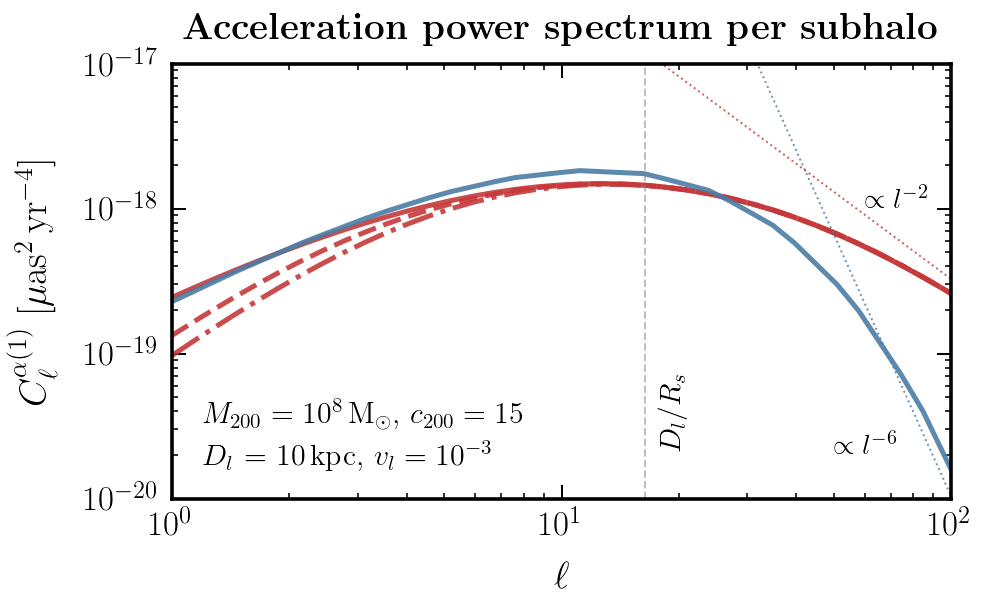

In [32]:
plt.figure(figsize=(8 / 1.15,5 / 1.15))

plt.plot(l_ary, pref*Cl_NFW_ary, label="NFW", color=cols_default[0])
plt.plot(l_ary, pref*Cl_tNFW_ary, label="tNFW, $\\tau = 15$", ls='--', color=cols_default[0])
plt.plot(l_ary, pref*Cl_tNFW2_ary, label="tNFW, $\\tau = 10$", ls='-.', color=cols_default[0])
plt.plot(l_ary, pref*Cl_Burk_ary, label="Burkert", color=cols_default[1])

n = 4 # is actually n + 2 
plt.plot(l_ary, (1/l_ary**n)*pref*Cl_NFW_ary[-1]/(1/(l_ary**n)[-1]), lw=1, alpha=0.8, ls='dotted', color=cols_default[0])

n = 8 # is actually n + 2 
l_base = 2000
fac = pref*pspec.Cl_Burk(M0, Dl, v, l_base)/(1e-6*asctorad/Year)**2/(1/(l_base**n))
plt.plot(l_ary, (1/l_ary**n)*fac, lw=1, alpha=0.8, ls='dotted', color=cols_default[1])

plt.text(60, 1e-18,'$\propto l^{-2}$', fontsize=14)
plt.text(50, 2e-20,'$\propto l^{-6}$', fontsize=14)

plt.axvline(1/(pspec.get_rs_rhos_NFW(M0)[0]/Dl), c='grey', lw=1, alpha=0.5, ls='--')
plt.text((1/(pspec.get_rs_rhos_NFW(M0)[0]/Dl)) + 1.5, 5e-20,'$D_l/R_s$',rotation=90, fontsize=15)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\ell$")
plt.ylabel("$C_\ell^{\\alpha (1)}$ [$\mu$as$^2$\,yr$^{-4}$]")

plt.text(1.2, 3.05e-20,'$M_{200} = 10^8\,$M$_\odot$, $c_{200}=15$', fontsize=15)
plt.text(1.2, 1.55e-20,'$D_l$ = 10\,kpc, $v_l=10^{-3}$', fontsize=15)

plt.xlim(l_min, 1e2)
plt.ylim(1e-20,1e-17)

plt.title('\\textbf{Acceleration power spectrum per subhalo}', fontsize=18.5, y=1.02)

# plt.legend(frameon=False)

plt.tight_layout()

if save_figs:
    plt.savefig(plots_dir + "alpha_single_2.pdf")